## Clone the repo

In [ ]:
!rm -r ./*
!git clone https://github.com/Mamiglia/BNN_Human_motion
!mv BNN_Human_motion/* .
!pip install bayesian-torch lightning

## Needed import

In [2]:
import torch
import os
from funcs.dataloader import load_dataset
from funcs.gated_recurrent_nn.model import Model
from funcs.gated_recurrent_nn.training import Training
from funcs.gated_recurrent_nn.testing import *

## Set the device

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device, '- Type:', torch.cuda.get_device_name(0))

Using device: cuda - Type: Tesla T4


## Load the datasets

In [4]:
train_dataset, vald_dataset, _ = load_dataset()

Loading Train Dataset...
Loading Validation Dataset...
Loading Test Dataset...
>>> Training dataset length: 180077
>>> Validation dataset length: 28110
>>> Test dataset length: 3840


## Model initialization

In [5]:
num_channels = 3
output_n = 25
input_n = 10
num_joints = 22
num_heads = 8
dropout = 0.3
d_model = 512
num_predictions = 2

model = Model(num_channels=num_channels,
              num_frames_out=output_n,
              old_frames=input_n,
              num_joints=num_joints,
              num_heads=num_heads,
              drop=dropout,
              d_model=d_model,
              num_predictions=num_predictions).to(device)

In [6]:
trainable, non_trainable, total = model.count_parameters()
print(f'Trainable parameters: {trainable}')
print(f'Total parameters: {total}')

Trainable parameters: 5281177
Total parameters: 5281177


## Training

In [ ]:
!pip install wandb -qqq
import wandb
wandb.login()

In [ ]:
clip_grad = None
n_epochs = 2
log_step = 100
lr = 1e-04
use_scheduler = True
milestones = [4, 8, 12, 16]
gamma = 0.7
weight_decay = 3e-04
use_wandb = False
save_and_plot = True
path = os.path.join(os.getcwd(), 'funcs/gated_recurrent_nn/checkpoints/Best_checkpoint.pt')


if use_wandb:
    wandb.init(project="AML_FinalProject", config={
        "learning_rate": lr,
        "dropout": dropout,
        "gamma": gamma,
        "weight_decay": weight_decay,
        "milestones": milestones,
        "architecture": "Encoder (Transformer+CNN) Decoder (GRU+CNN)",
        "parameters": trainable,
    })
    config = wandb.config


model_training = Training(model=model,
                          input_n=input_n,
                          output_n=output_n,
                          clip_grad=clip_grad,
                          device=device,
                          n_epochs=n_epochs,
                          log_step=log_step,
                          lr=lr,
                          use_scheduler=use_scheduler,
                          milestones=milestones,
                          gamma=gamma,
                          weight_decay=weight_decay,
                          use_wandb=use_wandb,
                          save_and_plot=save_and_plot,
                          path=path)

0it [00:00, ?it/s]

[Epoch: 1  | Iteration:     1 | Train ] MPJPE loss: 107.290 | KL loss: 0.989 | Total loss: 108.279


100it [02:30,  1.50s/it]

[Epoch: 1  | Iteration:   101 | Train ] MPJPE loss: 99.251 | KL loss: 0.985 | Total loss: 100.236


200it [05:00,  1.55s/it]

[Epoch: 1  | Iteration:   201 | Train ] MPJPE loss: 105.303 | KL loss: 0.981 | Total loss: 106.285


300it [07:30,  1.48s/it]

[Epoch: 1  | Iteration:   301 | Train ] MPJPE loss: 102.230 | KL loss: 0.978 | Total loss: 103.207


400it [09:59,  1.52s/it]

[Epoch: 1  | Iteration:   401 | Train ] MPJPE loss: 99.491 | KL loss: 0.974 | Total loss: 100.465


500it [12:29,  1.50s/it]

[Epoch: 1  | Iteration:   501 | Train ] MPJPE loss: 105.486 | KL loss: 0.970 | Total loss: 106.456


600it [14:59,  1.49s/it]

[Epoch: 1  | Iteration:   601 | Train ] MPJPE loss: 104.635 | KL loss: 0.967 | Total loss: 105.601


700it [17:29,  1.51s/it]

[Epoch: 1  | Iteration:   701 | Train ] MPJPE loss: 95.562 | KL loss: 0.963 | Total loss: 96.525


704it [17:35,  1.50s/it]
1it [00:01,  1.06s/it]

[Epoch: 1  | Iteration:     1 | Val   ] MPJPE loss: 118.894 | KL loss: 0.963 | Total loss: 119.857


101it [00:48,  2.13it/s]

[Epoch: 1  | Iteration:   101 | Val   ] MPJPE loss: 93.423 | KL loss: 0.963 | Total loss: 94.386


110it [00:53,  2.05it/s]
0it [00:00, ?it/s]

[Epoch: 2  | Iteration:     1 | Train ] MPJPE loss: 99.391 | KL loss: 0.963 | Total loss: 100.354


100it [02:36,  1.55s/it]

[Epoch: 2  | Iteration:   101 | Train ] MPJPE loss: 97.228 | KL loss: 0.960 | Total loss: 98.188


200it [05:12,  1.55s/it]

[Epoch: 2  | Iteration:   201 | Train ] MPJPE loss: 90.856 | KL loss: 0.957 | Total loss: 91.813


300it [07:46,  1.52s/it]

[Epoch: 2  | Iteration:   301 | Train ] MPJPE loss: 97.300 | KL loss: 0.954 | Total loss: 98.253


400it [10:19,  1.51s/it]

[Epoch: 2  | Iteration:   401 | Train ] MPJPE loss: 90.447 | KL loss: 0.951 | Total loss: 91.398


500it [12:52,  1.53s/it]

[Epoch: 2  | Iteration:   501 | Train ] MPJPE loss: 96.305 | KL loss: 0.948 | Total loss: 97.253


600it [15:25,  1.53s/it]

[Epoch: 2  | Iteration:   601 | Train ] MPJPE loss: 92.054 | KL loss: 0.945 | Total loss: 92.999


700it [17:59,  1.55s/it]

[Epoch: 2  | Iteration:   701 | Train ] MPJPE loss: 95.530 | KL loss: 0.942 | Total loss: 96.472


704it [18:05,  1.54s/it]
1it [00:00,  1.21it/s]

[Epoch: 2  | Iteration:     1 | Val   ] MPJPE loss: 107.413 | KL loss: 0.942 | Total loss: 108.354


101it [00:48,  2.12it/s]

[Epoch: 2  | Iteration:   101 | Val   ] MPJPE loss: 95.791 | KL loss: 0.942 | Total loss: 96.733


110it [00:52,  2.08it/s]
0it [00:00, ?it/s]

[Epoch: 3  | Iteration:     1 | Train ] MPJPE loss: 93.483 | KL loss: 0.942 | Total loss: 94.425


100it [02:38,  1.60s/it]

[Epoch: 3  | Iteration:   101 | Train ] MPJPE loss: 87.465 | KL loss: 0.939 | Total loss: 88.404


200it [05:16,  1.59s/it]

[Epoch: 3  | Iteration:   201 | Train ] MPJPE loss: 92.503 | KL loss: 0.936 | Total loss: 93.439


300it [07:52,  1.56s/it]

[Epoch: 3  | Iteration:   301 | Train ] MPJPE loss: 98.028 | KL loss: 0.933 | Total loss: 98.961


400it [10:27,  1.54s/it]

[Epoch: 3  | Iteration:   401 | Train ] MPJPE loss: 90.373 | KL loss: 0.930 | Total loss: 91.303


500it [13:01,  1.54s/it]

[Epoch: 3  | Iteration:   501 | Train ] MPJPE loss: 100.479 | KL loss: 0.927 | Total loss: 101.406


600it [15:34,  1.53s/it]

[Epoch: 3  | Iteration:   601 | Train ] MPJPE loss: 88.639 | KL loss: 0.925 | Total loss: 89.563


700it [18:07,  1.54s/it]

[Epoch: 3  | Iteration:   701 | Train ] MPJPE loss: 94.344 | KL loss: 0.922 | Total loss: 95.266


704it [18:14,  1.55s/it]
1it [00:00,  1.23it/s]

[Epoch: 3  | Iteration:     1 | Val   ] MPJPE loss: 106.476 | KL loss: 0.922 | Total loss: 107.398


101it [00:48,  2.12it/s]

[Epoch: 3  | Iteration:   101 | Val   ] MPJPE loss: 93.892 | KL loss: 0.922 | Total loss: 94.814


110it [00:53,  2.04it/s]
0it [00:00, ?it/s]

[Epoch: 4  | Iteration:     1 | Train ] MPJPE loss: 98.691 | KL loss: 0.922 | Total loss: 99.612


100it [02:39,  1.59s/it]

[Epoch: 4  | Iteration:   101 | Train ] MPJPE loss: 90.255 | KL loss: 0.919 | Total loss: 91.174


200it [05:17,  1.57s/it]

[Epoch: 4  | Iteration:   201 | Train ] MPJPE loss: 97.017 | KL loss: 0.916 | Total loss: 97.933


300it [07:53,  1.55s/it]

[Epoch: 4  | Iteration:   301 | Train ] MPJPE loss: 95.521 | KL loss: 0.913 | Total loss: 96.434


400it [10:28,  1.55s/it]

[Epoch: 4  | Iteration:   401 | Train ] MPJPE loss: 92.112 | KL loss: 0.910 | Total loss: 93.022


500it [13:02,  1.54s/it]

[Epoch: 4  | Iteration:   501 | Train ] MPJPE loss: 93.325 | KL loss: 0.908 | Total loss: 94.232


600it [15:37,  1.61s/it]

[Epoch: 4  | Iteration:   601 | Train ] MPJPE loss: 91.801 | KL loss: 0.905 | Total loss: 92.705


700it [18:10,  1.56s/it]

[Epoch: 4  | Iteration:   701 | Train ] MPJPE loss: 94.279 | KL loss: 0.902 | Total loss: 95.181


704it [18:17,  1.56s/it]
1it [00:00,  1.15it/s]

[Epoch: 4  | Iteration:     1 | Val   ] MPJPE loss: 103.428 | KL loss: 0.902 | Total loss: 104.330


101it [00:48,  2.08it/s]

[Epoch: 4  | Iteration:   101 | Val   ] MPJPE loss: 94.011 | KL loss: 0.902 | Total loss: 94.913


110it [00:53,  2.04it/s]
0it [00:00, ?it/s]

[Epoch: 5  | Iteration:     1 | Train ] MPJPE loss: 90.107 | KL loss: 0.902 | Total loss: 91.009


100it [02:38,  1.59s/it]

[Epoch: 5  | Iteration:   101 | Train ] MPJPE loss: 99.285 | KL loss: 0.899 | Total loss: 100.184


200it [05:16,  1.56s/it]

[Epoch: 5  | Iteration:   201 | Train ] MPJPE loss: 94.395 | KL loss: 0.896 | Total loss: 95.292


300it [07:51,  1.53s/it]

[Epoch: 5  | Iteration:   301 | Train ] MPJPE loss: 91.859 | KL loss: 0.893 | Total loss: 92.752


400it [10:26,  1.54s/it]

[Epoch: 5  | Iteration:   401 | Train ] MPJPE loss: 90.272 | KL loss: 0.891 | Total loss: 91.163


500it [12:59,  1.52s/it]

[Epoch: 5  | Iteration:   501 | Train ] MPJPE loss: 88.511 | KL loss: 0.888 | Total loss: 89.399


600it [15:32,  1.53s/it]

[Epoch: 5  | Iteration:   601 | Train ] MPJPE loss: 89.132 | KL loss: 0.885 | Total loss: 90.017


700it [18:05,  1.54s/it]

[Epoch: 5  | Iteration:   701 | Train ] MPJPE loss: 91.259 | KL loss: 0.882 | Total loss: 92.141


704it [18:11,  1.55s/it]
1it [00:00,  1.63it/s]

[Epoch: 5  | Iteration:     1 | Val   ] MPJPE loss: 99.078 | KL loss: 0.882 | Total loss: 99.960


101it [00:47,  2.06it/s]

[Epoch: 5  | Iteration:   101 | Val   ] MPJPE loss: 93.684 | KL loss: 0.882 | Total loss: 94.567


110it [00:52,  2.10it/s]
0it [00:00, ?it/s]

[Epoch: 6  | Iteration:     1 | Train ] MPJPE loss: 91.637 | KL loss: 0.882 | Total loss: 92.520


100it [02:37,  1.58s/it]

[Epoch: 6  | Iteration:   101 | Train ] MPJPE loss: 88.720 | KL loss: 0.880 | Total loss: 89.599


200it [05:15,  1.56s/it]

[Epoch: 6  | Iteration:   201 | Train ] MPJPE loss: 91.691 | KL loss: 0.877 | Total loss: 92.568


300it [07:50,  1.54s/it]

[Epoch: 6  | Iteration:   301 | Train ] MPJPE loss: 87.276 | KL loss: 0.874 | Total loss: 88.150


400it [10:24,  1.53s/it]

[Epoch: 6  | Iteration:   401 | Train ] MPJPE loss: 88.402 | KL loss: 0.871 | Total loss: 89.273


500it [12:58,  1.58s/it]

[Epoch: 6  | Iteration:   501 | Train ] MPJPE loss: 85.857 | KL loss: 0.869 | Total loss: 86.725


600it [15:31,  1.54s/it]

[Epoch: 6  | Iteration:   601 | Train ] MPJPE loss: 93.057 | KL loss: 0.866 | Total loss: 93.923


700it [18:04,  1.56s/it]

[Epoch: 6  | Iteration:   701 | Train ] MPJPE loss: 81.536 | KL loss: 0.863 | Total loss: 82.399


704it [18:11,  1.55s/it]
1it [00:00,  1.15it/s]

[Epoch: 6  | Iteration:     1 | Val   ] MPJPE loss: 97.907 | KL loss: 0.863 | Total loss: 98.770


101it [00:48,  2.11it/s]

[Epoch: 6  | Iteration:   101 | Val   ] MPJPE loss: 92.916 | KL loss: 0.863 | Total loss: 93.779


110it [00:53,  2.05it/s]
0it [00:00, ?it/s]

[Epoch: 7  | Iteration:     1 | Train ] MPJPE loss: 89.250 | KL loss: 0.863 | Total loss: 90.113


100it [02:38,  1.57s/it]

[Epoch: 7  | Iteration:   101 | Train ] MPJPE loss: 93.513 | KL loss: 0.860 | Total loss: 94.374


200it [05:16,  1.58s/it]

[Epoch: 7  | Iteration:   201 | Train ] MPJPE loss: 92.562 | KL loss: 0.858 | Total loss: 93.420


300it [07:51,  1.54s/it]

[Epoch: 7  | Iteration:   301 | Train ] MPJPE loss: 89.314 | KL loss: 0.855 | Total loss: 90.169


400it [10:26,  1.54s/it]

[Epoch: 7  | Iteration:   401 | Train ] MPJPE loss: 85.862 | KL loss: 0.852 | Total loss: 86.714


500it [13:01,  1.54s/it]

[Epoch: 7  | Iteration:   501 | Train ] MPJPE loss: 87.047 | KL loss: 0.850 | Total loss: 87.897


600it [15:35,  1.53s/it]

[Epoch: 7  | Iteration:   601 | Train ] MPJPE loss: 88.552 | KL loss: 0.847 | Total loss: 89.398


700it [18:08,  1.55s/it]

[Epoch: 7  | Iteration:   701 | Train ] MPJPE loss: 90.490 | KL loss: 0.844 | Total loss: 91.335


704it [18:15,  1.56s/it]
1it [00:00,  1.19it/s]

[Epoch: 7  | Iteration:     1 | Val   ] MPJPE loss: 94.965 | KL loss: 0.844 | Total loss: 95.809


101it [00:49,  2.06it/s]

[Epoch: 7  | Iteration:   101 | Val   ] MPJPE loss: 93.246 | KL loss: 0.844 | Total loss: 94.090


110it [00:55,  1.99it/s]
0it [00:00, ?it/s]

[Epoch: 8  | Iteration:     1 | Train ] MPJPE loss: 94.097 | KL loss: 0.844 | Total loss: 94.941


100it [02:40,  1.59s/it]

[Epoch: 8  | Iteration:   101 | Train ] MPJPE loss: 85.580 | KL loss: 0.841 | Total loss: 86.421


200it [05:18,  1.58s/it]

[Epoch: 8  | Iteration:   201 | Train ] MPJPE loss: 90.558 | KL loss: 0.839 | Total loss: 91.396


300it [07:55,  1.54s/it]

[Epoch: 8  | Iteration:   301 | Train ] MPJPE loss: 90.414 | KL loss: 0.836 | Total loss: 91.249


400it [10:31,  1.60s/it]

[Epoch: 8  | Iteration:   401 | Train ] MPJPE loss: 82.578 | KL loss: 0.833 | Total loss: 83.411


500it [13:06,  1.55s/it]

[Epoch: 8  | Iteration:   501 | Train ] MPJPE loss: 94.255 | KL loss: 0.831 | Total loss: 95.086


600it [15:40,  1.54s/it]

[Epoch: 8  | Iteration:   601 | Train ] MPJPE loss: 85.530 | KL loss: 0.828 | Total loss: 86.358


700it [18:13,  1.54s/it]

[Epoch: 8  | Iteration:   701 | Train ] MPJPE loss: 86.636 | KL loss: 0.825 | Total loss: 87.461


704it [18:20,  1.56s/it]
1it [00:00,  1.14it/s]

[Epoch: 8  | Iteration:     1 | Val   ] MPJPE loss: 91.164 | KL loss: 0.825 | Total loss: 91.989


101it [00:48,  2.08it/s]

[Epoch: 8  | Iteration:   101 | Val   ] MPJPE loss: 92.812 | KL loss: 0.825 | Total loss: 93.637


110it [00:54,  2.03it/s]
0it [00:00, ?it/s]

[Epoch: 9  | Iteration:     1 | Train ] MPJPE loss: 91.977 | KL loss: 0.825 | Total loss: 92.802


100it [02:39,  1.58s/it]

[Epoch: 9  | Iteration:   101 | Train ] MPJPE loss: 86.483 | KL loss: 0.822 | Total loss: 87.306


200it [05:18,  1.57s/it]

[Epoch: 9  | Iteration:   201 | Train ] MPJPE loss: 88.794 | KL loss: 0.820 | Total loss: 89.614


300it [07:55,  1.56s/it]

[Epoch: 9  | Iteration:   301 | Train ] MPJPE loss: 92.130 | KL loss: 0.817 | Total loss: 92.947


400it [10:30,  1.55s/it]

[Epoch: 9  | Iteration:   401 | Train ] MPJPE loss: 84.479 | KL loss: 0.814 | Total loss: 85.293


500it [13:04,  1.53s/it]

[Epoch: 9  | Iteration:   501 | Train ] MPJPE loss: 91.306 | KL loss: 0.812 | Total loss: 92.118


600it [15:38,  1.53s/it]

[Epoch: 9  | Iteration:   601 | Train ] MPJPE loss: 84.996 | KL loss: 0.809 | Total loss: 85.805


700it [18:11,  1.55s/it]

[Epoch: 9  | Iteration:   701 | Train ] MPJPE loss: 85.760 | KL loss: 0.806 | Total loss: 86.567


704it [18:18,  1.56s/it]
1it [00:00,  1.13it/s]

[Epoch: 9  | Iteration:     1 | Val   ] MPJPE loss: 89.615 | KL loss: 0.806 | Total loss: 90.421


101it [00:49,  2.08it/s]

[Epoch: 9  | Iteration:   101 | Val   ] MPJPE loss: 92.937 | KL loss: 0.806 | Total loss: 93.744


110it [00:54,  2.02it/s]
0it [00:00, ?it/s]

[Epoch: 10 | Iteration:     1 | Train ] MPJPE loss: 88.934 | KL loss: 0.806 | Total loss: 89.740


100it [02:37,  1.59s/it]

[Epoch: 10 | Iteration:   101 | Train ] MPJPE loss: 91.605 | KL loss: 0.803 | Total loss: 92.409


200it [05:14,  1.59s/it]

[Epoch: 10 | Iteration:   201 | Train ] MPJPE loss: 86.191 | KL loss: 0.801 | Total loss: 86.992


300it [07:50,  1.57s/it]

[Epoch: 10 | Iteration:   301 | Train ] MPJPE loss: 90.596 | KL loss: 0.798 | Total loss: 91.394


400it [10:24,  1.55s/it]

[Epoch: 10 | Iteration:   401 | Train ] MPJPE loss: 85.370 | KL loss: 0.795 | Total loss: 86.166


500it [12:58,  1.54s/it]

[Epoch: 10 | Iteration:   501 | Train ] MPJPE loss: 90.168 | KL loss: 0.793 | Total loss: 90.961


600it [15:32,  1.54s/it]

[Epoch: 10 | Iteration:   601 | Train ] MPJPE loss: 85.572 | KL loss: 0.790 | Total loss: 86.363


700it [18:06,  1.55s/it]

[Epoch: 10 | Iteration:   701 | Train ] MPJPE loss: 88.968 | KL loss: 0.787 | Total loss: 89.755


704it [18:13,  1.55s/it]
1it [00:00,  1.16it/s]

[Epoch: 10 | Iteration:     1 | Val   ] MPJPE loss: 86.931 | KL loss: 0.787 | Total loss: 87.719


101it [00:48,  2.10it/s]

[Epoch: 10 | Iteration:   101 | Val   ] MPJPE loss: 92.474 | KL loss: 0.787 | Total loss: 93.262


110it [00:54,  2.03it/s]
0it [00:00, ?it/s]

[Epoch: 11 | Iteration:     1 | Train ] MPJPE loss: 92.343 | KL loss: 0.787 | Total loss: 93.131


100it [02:39,  1.60s/it]

[Epoch: 11 | Iteration:   101 | Train ] MPJPE loss: 90.764 | KL loss: 0.785 | Total loss: 91.549


200it [05:18,  1.58s/it]

[Epoch: 11 | Iteration:   201 | Train ] MPJPE loss: 89.349 | KL loss: 0.782 | Total loss: 90.132


300it [07:56,  1.54s/it]

[Epoch: 11 | Iteration:   301 | Train ] MPJPE loss: 83.101 | KL loss: 0.779 | Total loss: 83.881


400it [10:31,  1.53s/it]

[Epoch: 11 | Iteration:   401 | Train ] MPJPE loss: 85.503 | KL loss: 0.777 | Total loss: 86.279


500it [13:05,  1.54s/it]

[Epoch: 11 | Iteration:   501 | Train ] MPJPE loss: 86.172 | KL loss: 0.774 | Total loss: 86.946


600it [15:40,  1.59s/it]

[Epoch: 11 | Iteration:   601 | Train ] MPJPE loss: 91.329 | KL loss: 0.771 | Total loss: 92.100


700it [18:12,  1.54s/it]

[Epoch: 11 | Iteration:   701 | Train ] MPJPE loss: 87.632 | KL loss: 0.769 | Total loss: 88.401


704it [18:19,  1.56s/it]
1it [00:00,  1.18it/s]

[Epoch: 11 | Iteration:     1 | Val   ] MPJPE loss: 85.668 | KL loss: 0.769 | Total loss: 86.436


101it [00:48,  2.09it/s]

[Epoch: 11 | Iteration:   101 | Val   ] MPJPE loss: 91.552 | KL loss: 0.769 | Total loss: 92.321


110it [00:53,  2.05it/s]
0it [00:00, ?it/s]

[Epoch: 12 | Iteration:     1 | Train ] MPJPE loss: 83.736 | KL loss: 0.769 | Total loss: 84.505


100it [02:39,  1.58s/it]

[Epoch: 12 | Iteration:   101 | Train ] MPJPE loss: 87.711 | KL loss: 0.766 | Total loss: 88.477


200it [05:17,  1.59s/it]

[Epoch: 12 | Iteration:   201 | Train ] MPJPE loss: 82.508 | KL loss: 0.763 | Total loss: 83.271


300it [07:54,  1.54s/it]

[Epoch: 12 | Iteration:   301 | Train ] MPJPE loss: 86.635 | KL loss: 0.761 | Total loss: 87.396


400it [10:29,  1.54s/it]

[Epoch: 12 | Iteration:   401 | Train ] MPJPE loss: 85.063 | KL loss: 0.758 | Total loss: 85.821


500it [13:03,  1.53s/it]

[Epoch: 12 | Iteration:   501 | Train ] MPJPE loss: 86.132 | KL loss: 0.756 | Total loss: 86.888


600it [15:36,  1.54s/it]

[Epoch: 12 | Iteration:   601 | Train ] MPJPE loss: 89.563 | KL loss: 0.753 | Total loss: 90.316


700it [18:10,  1.54s/it]

[Epoch: 12 | Iteration:   701 | Train ] MPJPE loss: 85.413 | KL loss: 0.750 | Total loss: 86.163


704it [18:16,  1.56s/it]
1it [00:00,  1.16it/s]

[Epoch: 12 | Iteration:     1 | Val   ] MPJPE loss: 85.078 | KL loss: 0.750 | Total loss: 85.828


101it [00:48,  2.10it/s]

[Epoch: 12 | Iteration:   101 | Val   ] MPJPE loss: 91.005 | KL loss: 0.750 | Total loss: 91.756


110it [00:53,  2.06it/s]
0it [00:00, ?it/s]

[Epoch: 13 | Iteration:     1 | Train ] MPJPE loss: 89.496 | KL loss: 0.750 | Total loss: 90.247


100it [02:38,  1.56s/it]

[Epoch: 13 | Iteration:   101 | Train ] MPJPE loss: 88.839 | KL loss: 0.748 | Total loss: 89.587


200it [05:15,  1.56s/it]

[Epoch: 13 | Iteration:   201 | Train ] MPJPE loss: 82.965 | KL loss: 0.745 | Total loss: 83.711


300it [07:51,  1.53s/it]

[Epoch: 13 | Iteration:   301 | Train ] MPJPE loss: 86.438 | KL loss: 0.742 | Total loss: 87.180


400it [10:26,  1.56s/it]

[Epoch: 13 | Iteration:   401 | Train ] MPJPE loss: 79.708 | KL loss: 0.740 | Total loss: 80.448


500it [13:00,  1.57s/it]

[Epoch: 13 | Iteration:   501 | Train ] MPJPE loss: 85.744 | KL loss: 0.737 | Total loss: 86.482


600it [15:34,  1.54s/it]

[Epoch: 13 | Iteration:   601 | Train ] MPJPE loss: 83.853 | KL loss: 0.735 | Total loss: 84.587


700it [18:08,  1.56s/it]

[Epoch: 13 | Iteration:   701 | Train ] MPJPE loss: 84.668 | KL loss: 0.732 | Total loss: 85.400


704it [18:14,  1.56s/it]
1it [00:00,  1.15it/s]

[Epoch: 13 | Iteration:     1 | Val   ] MPJPE loss: 83.620 | KL loss: 0.732 | Total loss: 84.352


101it [00:49,  2.06it/s]

[Epoch: 13 | Iteration:   101 | Val   ] MPJPE loss: 92.142 | KL loss: 0.732 | Total loss: 92.874


110it [00:54,  2.01it/s]
0it [00:00, ?it/s]

[Epoch: 14 | Iteration:     1 | Train ] MPJPE loss: 87.681 | KL loss: 0.732 | Total loss: 88.413


100it [02:39,  1.58s/it]

[Epoch: 14 | Iteration:   101 | Train ] MPJPE loss: 90.065 | KL loss: 0.729 | Total loss: 90.794


200it [05:18,  1.57s/it]

[Epoch: 14 | Iteration:   201 | Train ] MPJPE loss: 80.895 | KL loss: 0.727 | Total loss: 81.621


300it [07:54,  1.55s/it]

[Epoch: 14 | Iteration:   301 | Train ] MPJPE loss: 89.538 | KL loss: 0.724 | Total loss: 90.262


400it [10:29,  1.54s/it]

[Epoch: 14 | Iteration:   401 | Train ] MPJPE loss: 82.498 | KL loss: 0.722 | Total loss: 83.219


500it [13:03,  1.54s/it]

[Epoch: 14 | Iteration:   501 | Train ] MPJPE loss: 85.667 | KL loss: 0.719 | Total loss: 86.386


600it [15:37,  1.53s/it]

[Epoch: 14 | Iteration:   601 | Train ] MPJPE loss: 81.149 | KL loss: 0.717 | Total loss: 81.865


700it [18:11,  1.54s/it]

[Epoch: 14 | Iteration:   701 | Train ] MPJPE loss: 82.858 | KL loss: 0.714 | Total loss: 83.572


704it [18:18,  1.56s/it]
1it [00:00,  1.16it/s]

[Epoch: 14 | Iteration:     1 | Val   ] MPJPE loss: 84.169 | KL loss: 0.714 | Total loss: 84.882


101it [00:49,  2.09it/s]

[Epoch: 14 | Iteration:   101 | Val   ] MPJPE loss: 92.157 | KL loss: 0.714 | Total loss: 92.870


110it [00:54,  2.01it/s]
0it [00:00, ?it/s]

[Epoch: 15 | Iteration:     1 | Train ] MPJPE loss: 81.739 | KL loss: 0.714 | Total loss: 82.453


100it [02:39,  1.62s/it]

[Epoch: 15 | Iteration:   101 | Train ] MPJPE loss: 92.280 | KL loss: 0.711 | Total loss: 92.991


200it [05:18,  1.65s/it]

[Epoch: 15 | Iteration:   201 | Train ] MPJPE loss: 84.524 | KL loss: 0.709 | Total loss: 85.233


300it [07:54,  1.55s/it]

[Epoch: 15 | Iteration:   301 | Train ] MPJPE loss: 86.439 | KL loss: 0.706 | Total loss: 87.145


400it [10:30,  1.56s/it]

[Epoch: 15 | Iteration:   401 | Train ] MPJPE loss: 94.633 | KL loss: 0.704 | Total loss: 95.337


500it [13:05,  1.55s/it]

[Epoch: 15 | Iteration:   501 | Train ] MPJPE loss: 87.523 | KL loss: 0.701 | Total loss: 88.224


600it [15:39,  1.53s/it]

[Epoch: 15 | Iteration:   601 | Train ] MPJPE loss: 82.822 | KL loss: 0.699 | Total loss: 83.520


700it [18:12,  1.54s/it]

[Epoch: 15 | Iteration:   701 | Train ] MPJPE loss: 85.713 | KL loss: 0.696 | Total loss: 86.409


704it [18:19,  1.56s/it]
1it [00:00,  1.13it/s]

[Epoch: 15 | Iteration:     1 | Val   ] MPJPE loss: 85.472 | KL loss: 0.696 | Total loss: 86.167


101it [00:49,  2.04it/s]

[Epoch: 15 | Iteration:   101 | Val   ] MPJPE loss: 94.830 | KL loss: 0.696 | Total loss: 95.526


110it [00:55,  1.99it/s]
0it [00:00, ?it/s]

[Epoch: 16 | Iteration:     1 | Train ] MPJPE loss: 82.208 | KL loss: 0.696 | Total loss: 82.904


100it [02:38,  1.57s/it]

[Epoch: 16 | Iteration:   101 | Train ] MPJPE loss: 83.319 | KL loss: 0.693 | Total loss: 84.013


200it [05:15,  1.56s/it]

[Epoch: 16 | Iteration:   201 | Train ] MPJPE loss: 89.523 | KL loss: 0.691 | Total loss: 90.214


300it [07:51,  1.53s/it]

[Epoch: 16 | Iteration:   301 | Train ] MPJPE loss: 83.333 | KL loss: 0.688 | Total loss: 84.021


400it [10:26,  1.53s/it]

[Epoch: 16 | Iteration:   401 | Train ] MPJPE loss: 79.902 | KL loss: 0.686 | Total loss: 80.588


500it [12:59,  1.53s/it]

[Epoch: 16 | Iteration:   501 | Train ] MPJPE loss: 84.436 | KL loss: 0.683 | Total loss: 85.119


600it [15:32,  1.52s/it]

[Epoch: 16 | Iteration:   601 | Train ] MPJPE loss: 82.861 | KL loss: 0.681 | Total loss: 83.542


700it [18:05,  1.54s/it]

[Epoch: 16 | Iteration:   701 | Train ] MPJPE loss: 85.937 | KL loss: 0.678 | Total loss: 86.615


704it [18:12,  1.55s/it]
1it [00:00,  1.20it/s]

[Epoch: 16 | Iteration:     1 | Val   ] MPJPE loss: 83.903 | KL loss: 0.678 | Total loss: 84.581


101it [00:47,  2.17it/s]

[Epoch: 16 | Iteration:   101 | Val   ] MPJPE loss: 94.287 | KL loss: 0.678 | Total loss: 94.965


110it [00:51,  2.12it/s]
0it [00:00, ?it/s]

[Epoch: 17 | Iteration:     1 | Train ] MPJPE loss: 81.418 | KL loss: 0.678 | Total loss: 82.097


100it [02:36,  1.62s/it]

[Epoch: 17 | Iteration:   101 | Train ] MPJPE loss: 80.964 | KL loss: 0.676 | Total loss: 81.640


200it [05:12,  1.57s/it]

[Epoch: 17 | Iteration:   201 | Train ] MPJPE loss: 75.989 | KL loss: 0.673 | Total loss: 76.662


300it [07:46,  1.52s/it]

[Epoch: 17 | Iteration:   301 | Train ] MPJPE loss: 81.815 | KL loss: 0.671 | Total loss: 82.485


400it [10:19,  1.54s/it]

[Epoch: 17 | Iteration:   401 | Train ] MPJPE loss: 79.489 | KL loss: 0.668 | Total loss: 80.157


500it [12:51,  1.51s/it]

[Epoch: 17 | Iteration:   501 | Train ] MPJPE loss: 87.470 | KL loss: 0.666 | Total loss: 88.136


600it [15:24,  1.51s/it]

[Epoch: 17 | Iteration:   601 | Train ] MPJPE loss: 82.695 | KL loss: 0.663 | Total loss: 83.358


700it [17:56,  1.53s/it]

[Epoch: 17 | Iteration:   701 | Train ] MPJPE loss: 79.338 | KL loss: 0.661 | Total loss: 79.999


704it [18:02,  1.54s/it]
1it [00:00,  1.16it/s]

[Epoch: 17 | Iteration:     1 | Val   ] MPJPE loss: 80.134 | KL loss: 0.660 | Total loss: 80.795


101it [00:47,  2.15it/s]

[Epoch: 17 | Iteration:   101 | Val   ] MPJPE loss: 92.855 | KL loss: 0.660 | Total loss: 93.516


110it [00:52,  2.08it/s]
0it [00:00, ?it/s]

[Epoch: 18 | Iteration:     1 | Train ] MPJPE loss: 84.316 | KL loss: 0.660 | Total loss: 84.977


100it [02:36,  1.56s/it]

[Epoch: 18 | Iteration:   101 | Train ] MPJPE loss: 86.628 | KL loss: 0.658 | Total loss: 87.286


200it [05:12,  1.55s/it]

[Epoch: 18 | Iteration:   201 | Train ] MPJPE loss: 84.788 | KL loss: 0.656 | Total loss: 85.444


300it [07:46,  1.53s/it]

[Epoch: 18 | Iteration:   301 | Train ] MPJPE loss: 86.028 | KL loss: 0.653 | Total loss: 86.681


400it [10:20,  1.53s/it]

[Epoch: 18 | Iteration:   401 | Train ] MPJPE loss: 78.736 | KL loss: 0.651 | Total loss: 79.387


500it [12:52,  1.52s/it]

[Epoch: 18 | Iteration:   501 | Train ] MPJPE loss: 75.924 | KL loss: 0.648 | Total loss: 76.573


600it [15:25,  1.51s/it]

[Epoch: 18 | Iteration:   601 | Train ] MPJPE loss: 89.019 | KL loss: 0.646 | Total loss: 89.665


700it [17:57,  1.54s/it]

[Epoch: 18 | Iteration:   701 | Train ] MPJPE loss: 86.898 | KL loss: 0.643 | Total loss: 87.541


704it [18:04,  1.54s/it]
1it [00:00,  1.15it/s]

[Epoch: 18 | Iteration:     1 | Val   ] MPJPE loss: 80.989 | KL loss: 0.643 | Total loss: 81.632


101it [00:48,  2.14it/s]

[Epoch: 18 | Iteration:   101 | Val   ] MPJPE loss: 94.973 | KL loss: 0.643 | Total loss: 95.616


110it [00:53,  2.06it/s]
0it [00:00, ?it/s]

[Epoch: 19 | Iteration:     1 | Train ] MPJPE loss: 88.407 | KL loss: 0.643 | Total loss: 89.050


100it [02:38,  1.61s/it]

[Epoch: 19 | Iteration:   101 | Train ] MPJPE loss: 80.980 | KL loss: 0.641 | Total loss: 81.620


200it [05:14,  1.56s/it]

[Epoch: 19 | Iteration:   201 | Train ] MPJPE loss: 83.290 | KL loss: 0.638 | Total loss: 83.929


300it [07:49,  1.53s/it]

[Epoch: 19 | Iteration:   301 | Train ] MPJPE loss: 84.411 | KL loss: 0.636 | Total loss: 85.047


400it [10:23,  1.54s/it]

[Epoch: 19 | Iteration:   401 | Train ] MPJPE loss: 79.062 | KL loss: 0.633 | Total loss: 79.695


500it [12:56,  1.53s/it]

[Epoch: 19 | Iteration:   501 | Train ] MPJPE loss: 83.623 | KL loss: 0.631 | Total loss: 84.254


600it [15:29,  1.53s/it]

[Epoch: 19 | Iteration:   601 | Train ] MPJPE loss: 80.856 | KL loss: 0.629 | Total loss: 81.485


700it [18:02,  1.54s/it]

[Epoch: 19 | Iteration:   701 | Train ] MPJPE loss: 82.573 | KL loss: 0.626 | Total loss: 83.199


704it [18:09,  1.55s/it]
1it [00:00,  1.16it/s]

[Epoch: 19 | Iteration:     1 | Val   ] MPJPE loss: 79.672 | KL loss: 0.626 | Total loss: 80.298


101it [00:48,  2.13it/s]

[Epoch: 19 | Iteration:   101 | Val   ] MPJPE loss: 99.308 | KL loss: 0.626 | Total loss: 99.935


110it [00:53,  2.05it/s]
0it [00:00, ?it/s]

[Epoch: 20 | Iteration:     1 | Train ] MPJPE loss: 81.304 | KL loss: 0.626 | Total loss: 81.930


100it [02:37,  1.56s/it]

[Epoch: 20 | Iteration:   101 | Train ] MPJPE loss: 81.331 | KL loss: 0.624 | Total loss: 81.954


200it [05:14,  1.55s/it]

[Epoch: 20 | Iteration:   201 | Train ] MPJPE loss: 80.463 | KL loss: 0.621 | Total loss: 81.084


300it [07:50,  1.53s/it]

[Epoch: 20 | Iteration:   301 | Train ] MPJPE loss: 87.509 | KL loss: 0.619 | Total loss: 88.128


400it [10:24,  1.53s/it]

[Epoch: 20 | Iteration:   401 | Train ] MPJPE loss: 81.381 | KL loss: 0.617 | Total loss: 81.998


500it [12:58,  1.54s/it]

[Epoch: 20 | Iteration:   501 | Train ] MPJPE loss: 84.863 | KL loss: 0.614 | Total loss: 85.478


600it [15:31,  1.51s/it]

[Epoch: 20 | Iteration:   601 | Train ] MPJPE loss: 81.393 | KL loss: 0.612 | Total loss: 82.005


700it [18:04,  1.54s/it]

[Epoch: 20 | Iteration:   701 | Train ] MPJPE loss: 77.358 | KL loss: 0.610 | Total loss: 77.968


704it [18:11,  1.55s/it]
1it [00:00,  1.15it/s]

[Epoch: 20 | Iteration:     1 | Val   ] MPJPE loss: 79.416 | KL loss: 0.609 | Total loss: 80.026


101it [00:48,  2.12it/s]

[Epoch: 20 | Iteration:   101 | Val   ] MPJPE loss: 99.786 | KL loss: 0.609 | Total loss: 100.395


110it [00:52,  2.08it/s]
0it [00:00, ?it/s]

[Epoch: 21 | Iteration:     1 | Train ] MPJPE loss: 86.685 | KL loss: 0.609 | Total loss: 87.295


100it [02:39,  1.64s/it]

[Epoch: 21 | Iteration:   101 | Train ] MPJPE loss: 76.286 | KL loss: 0.607 | Total loss: 76.893


200it [05:16,  1.59s/it]

[Epoch: 21 | Iteration:   201 | Train ] MPJPE loss: 80.067 | KL loss: 0.605 | Total loss: 80.671


300it [07:52,  1.56s/it]

[Epoch: 21 | Iteration:   301 | Train ] MPJPE loss: 78.508 | KL loss: 0.602 | Total loss: 79.111


400it [10:26,  1.53s/it]

[Epoch: 21 | Iteration:   401 | Train ] MPJPE loss: 82.780 | KL loss: 0.600 | Total loss: 83.380


500it [13:00,  1.54s/it]

[Epoch: 21 | Iteration:   501 | Train ] MPJPE loss: 78.214 | KL loss: 0.598 | Total loss: 78.812


600it [15:33,  1.52s/it]

[Epoch: 21 | Iteration:   601 | Train ] MPJPE loss: 81.427 | KL loss: 0.595 | Total loss: 82.023


700it [18:06,  1.54s/it]

[Epoch: 21 | Iteration:   701 | Train ] MPJPE loss: 89.117 | KL loss: 0.593 | Total loss: 89.710


704it [18:13,  1.55s/it]
1it [00:00,  1.17it/s]

[Epoch: 21 | Iteration:     1 | Val   ] MPJPE loss: 77.858 | KL loss: 0.593 | Total loss: 78.451


101it [00:48,  2.09it/s]

[Epoch: 21 | Iteration:   101 | Val   ] MPJPE loss: 97.834 | KL loss: 0.593 | Total loss: 98.427


110it [00:53,  2.05it/s]
0it [00:00, ?it/s]

[Epoch: 22 | Iteration:     1 | Train ] MPJPE loss: 78.518 | KL loss: 0.593 | Total loss: 79.111


100it [02:38,  1.57s/it]

[Epoch: 22 | Iteration:   101 | Train ] MPJPE loss: 84.901 | KL loss: 0.591 | Total loss: 85.491


200it [05:15,  1.56s/it]

[Epoch: 22 | Iteration:   201 | Train ] MPJPE loss: 82.137 | KL loss: 0.588 | Total loss: 82.726


300it [07:50,  1.54s/it]

[Epoch: 22 | Iteration:   301 | Train ] MPJPE loss: 76.596 | KL loss: 0.586 | Total loss: 77.182


400it [10:24,  1.54s/it]

[Epoch: 22 | Iteration:   401 | Train ] MPJPE loss: 78.364 | KL loss: 0.584 | Total loss: 78.948


500it [12:58,  1.53s/it]

[Epoch: 22 | Iteration:   501 | Train ] MPJPE loss: 77.132 | KL loss: 0.582 | Total loss: 77.714


600it [15:31,  1.52s/it]

[Epoch: 22 | Iteration:   601 | Train ] MPJPE loss: 84.491 | KL loss: 0.579 | Total loss: 85.070


700it [18:04,  1.54s/it]

[Epoch: 22 | Iteration:   701 | Train ] MPJPE loss: 77.030 | KL loss: 0.577 | Total loss: 77.607


704it [18:11,  1.55s/it]
1it [00:00,  1.14it/s]

[Epoch: 22 | Iteration:     1 | Val   ] MPJPE loss: 80.845 | KL loss: 0.577 | Total loss: 81.422


101it [00:48,  2.12it/s]

[Epoch: 22 | Iteration:   101 | Val   ] MPJPE loss: 99.363 | KL loss: 0.577 | Total loss: 99.940


110it [00:53,  2.06it/s]
0it [00:00, ?it/s]

[Epoch: 23 | Iteration:     1 | Train ] MPJPE loss: 82.253 | KL loss: 0.577 | Total loss: 82.830


100it [02:38,  1.57s/it]

[Epoch: 23 | Iteration:   101 | Train ] MPJPE loss: 82.114 | KL loss: 0.575 | Total loss: 82.689


200it [05:15,  1.61s/it]

[Epoch: 23 | Iteration:   201 | Train ] MPJPE loss: 84.113 | KL loss: 0.572 | Total loss: 84.685


300it [07:50,  1.53s/it]

[Epoch: 23 | Iteration:   301 | Train ] MPJPE loss: 77.347 | KL loss: 0.570 | Total loss: 77.917


400it [10:24,  1.54s/it]

[Epoch: 23 | Iteration:   401 | Train ] MPJPE loss: 83.124 | KL loss: 0.568 | Total loss: 83.692


500it [12:58,  1.53s/it]

[Epoch: 23 | Iteration:   501 | Train ] MPJPE loss: 80.682 | KL loss: 0.566 | Total loss: 81.248


600it [15:31,  1.52s/it]

[Epoch: 23 | Iteration:   601 | Train ] MPJPE loss: 81.937 | KL loss: 0.564 | Total loss: 82.501


700it [18:05,  1.53s/it]

[Epoch: 23 | Iteration:   701 | Train ] MPJPE loss: 77.086 | KL loss: 0.561 | Total loss: 77.648


704it [18:12,  1.55s/it]
1it [00:00,  1.19it/s]

[Epoch: 23 | Iteration:     1 | Val   ] MPJPE loss: 83.560 | KL loss: 0.561 | Total loss: 84.122


101it [00:48,  2.12it/s]

[Epoch: 23 | Iteration:   101 | Val   ] MPJPE loss: 99.211 | KL loss: 0.561 | Total loss: 99.772


110it [00:53,  2.05it/s]
0it [00:00, ?it/s]

[Epoch: 24 | Iteration:     1 | Train ] MPJPE loss: 83.828 | KL loss: 0.561 | Total loss: 84.389


100it [02:38,  1.59s/it]

[Epoch: 24 | Iteration:   101 | Train ] MPJPE loss: 77.334 | KL loss: 0.559 | Total loss: 77.893


200it [05:15,  1.57s/it]

[Epoch: 24 | Iteration:   201 | Train ] MPJPE loss: 82.995 | KL loss: 0.557 | Total loss: 83.552


300it [07:50,  1.59s/it]

[Epoch: 24 | Iteration:   301 | Train ] MPJPE loss: 78.114 | KL loss: 0.555 | Total loss: 78.669


400it [10:23,  1.52s/it]

[Epoch: 24 | Iteration:   401 | Train ] MPJPE loss: 80.131 | KL loss: 0.552 | Total loss: 80.683


500it [12:55,  1.52s/it]

[Epoch: 24 | Iteration:   501 | Train ] MPJPE loss: 81.555 | KL loss: 0.550 | Total loss: 82.105


600it [15:28,  1.52s/it]

[Epoch: 24 | Iteration:   601 | Train ] MPJPE loss: 83.988 | KL loss: 0.548 | Total loss: 84.536


700it [18:00,  1.54s/it]

[Epoch: 24 | Iteration:   701 | Train ] MPJPE loss: 82.006 | KL loss: 0.546 | Total loss: 82.552


704it [18:07,  1.54s/it]
1it [00:00,  1.09it/s]

[Epoch: 24 | Iteration:     1 | Val   ] MPJPE loss: 79.297 | KL loss: 0.546 | Total loss: 79.843


101it [00:47,  2.12it/s]

[Epoch: 24 | Iteration:   101 | Val   ] MPJPE loss: 100.298 | KL loss: 0.546 | Total loss: 100.844


110it [00:52,  2.08it/s]
0it [00:00, ?it/s]

[Epoch: 25 | Iteration:     1 | Train ] MPJPE loss: 81.021 | KL loss: 0.546 | Total loss: 81.567


100it [02:37,  1.57s/it]

[Epoch: 25 | Iteration:   101 | Train ] MPJPE loss: 74.253 | KL loss: 0.544 | Total loss: 74.796


200it [05:13,  1.55s/it]

[Epoch: 25 | Iteration:   201 | Train ] MPJPE loss: 74.372 | KL loss: 0.542 | Total loss: 74.913


300it [07:48,  1.54s/it]

[Epoch: 25 | Iteration:   301 | Train ] MPJPE loss: 74.357 | KL loss: 0.539 | Total loss: 74.896


400it [10:21,  1.53s/it]

[Epoch: 25 | Iteration:   401 | Train ] MPJPE loss: 83.523 | KL loss: 0.537 | Total loss: 84.060


500it [12:53,  1.51s/it]

[Epoch: 25 | Iteration:   501 | Train ] MPJPE loss: 82.603 | KL loss: 0.535 | Total loss: 83.138


600it [15:26,  1.51s/it]

[Epoch: 25 | Iteration:   601 | Train ] MPJPE loss: 78.634 | KL loss: 0.533 | Total loss: 79.167


700it [17:58,  1.54s/it]

[Epoch: 25 | Iteration:   701 | Train ] MPJPE loss: 82.102 | KL loss: 0.531 | Total loss: 82.633


704it [18:05,  1.54s/it]
1it [00:00,  1.17it/s]

[Epoch: 25 | Iteration:     1 | Val   ] MPJPE loss: 76.538 | KL loss: 0.531 | Total loss: 77.068


101it [00:47,  2.16it/s]

[Epoch: 25 | Iteration:   101 | Val   ] MPJPE loss: 100.416 | KL loss: 0.531 | Total loss: 100.947


110it [00:52,  2.08it/s]


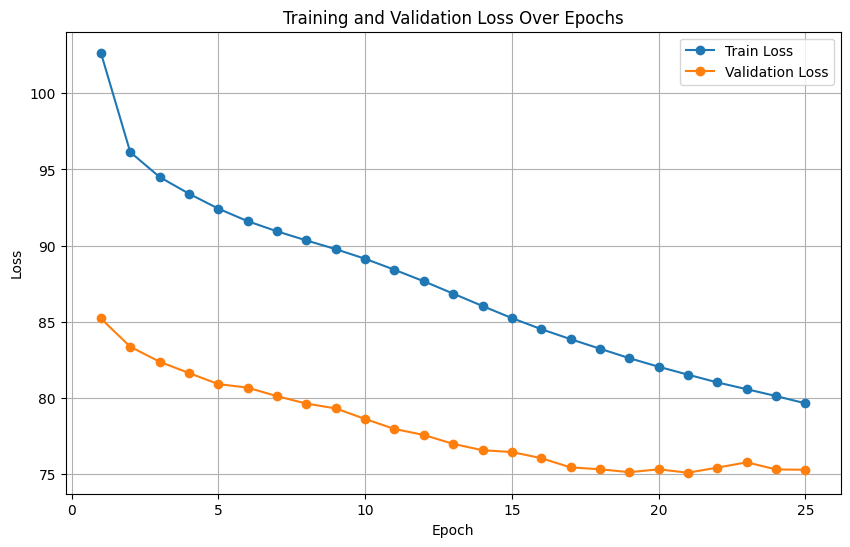

In [ ]:
train_losses, val_losses = model_training.train(data_loader=train_dataset,
                                                vald_loader=vald_dataset)

## Testing

In [ ]:
_, _, test_dataset = load_dataset()

Loading Train Dataset...
Loading Validation Dataset...
Loading Test Dataset...
>>> Training dataset length: 180077
>>> Validation dataset length: 28110
>>> Test dataset length: 3840


In [ ]:
num_channels = 3
output_n = 25
input_n = 10
num_joints = 22
num_heads = 8
dropout = 0.3
d_model = 512
num_predictions = 100

model = Model(num_channels=num_channels,
              num_frames_out=output_n,
              old_frames=input_n,
              num_joints=num_joints,
              num_heads=num_heads,
              drop=dropout,
              d_model=d_model,
              num_predictions=num_predictions)

In [1]:
ckpt_path = path
output_n = 25
input_n = 10
actions_to_consider_test = 'all'

test(model=model,
     ckpt_path=ckpt_path,
     test_loader=test_dataset,
     input_n=input_n,
     output_n=output_n,
     actions_to_consider_test=actions_to_consider_test)

Model loaded
walking :  73.5
eating :  63.0
smoking :  61.1
discussion :  98.7
directions :  87.8
greeting :  117.7
phoning :  79.7
posing :  120.6
purchases :  107.2
sitting :  84.3
sittingdown :  107.1
takingphoto :  83.9
waiting :  88.9
walkingdog :  117.1
walkingtogether :  65.7
Average: 90.4
Prediction time:  3.8380204730563694


In [ ]:
num_channels = 3
output_n = 25
input_n = 10
num_joints = 22
num_heads = 8
dropout = 0.3
d_model = 512
num_predictions = 200
return_sample = True

model = Model(num_channels=num_channels,
              num_frames_out=output_n,
              old_frames=input_n,
              num_joints=num_joints,
              num_heads=num_heads,
              drop=dropout,
              d_model=d_model,
              num_predictions=num_predictions,
              return_sample=return_sample)

In [ ]:
mu, ci, isin, dev = get_ci(model=model,
                           ckpt_path=ckpt_path,
                           test_loader=test_dataset,
                           input_n=input_n,
                           output_n=output_n)

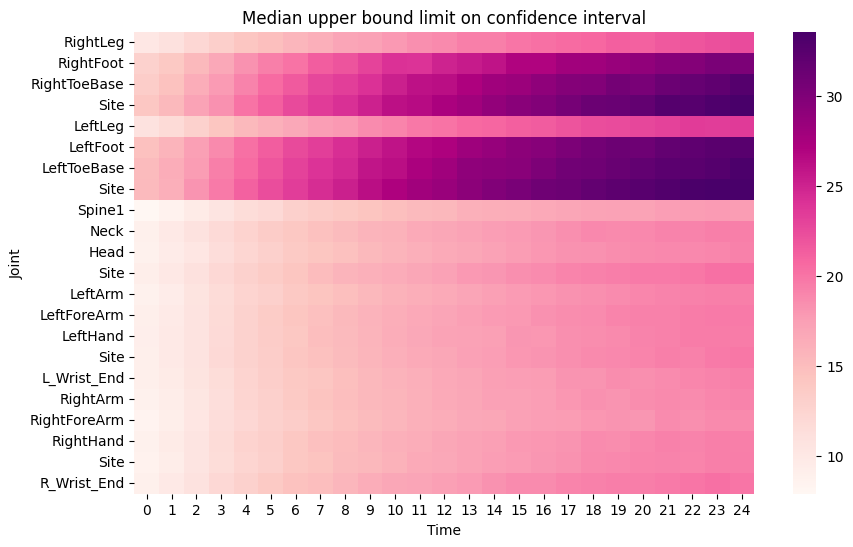

In [ ]:
plot_ci(ci, cmap='RdPu')

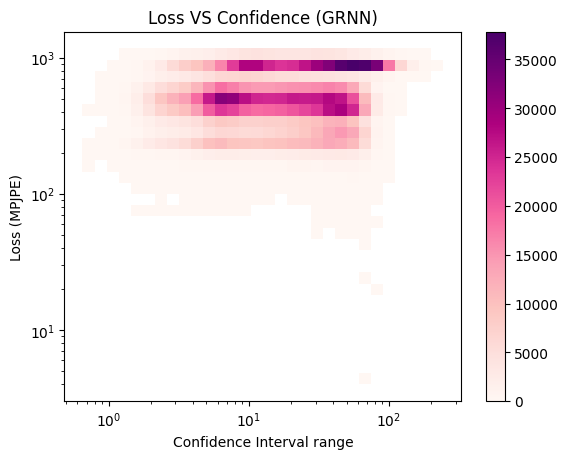

In [ ]:
plot_loss_conf(ci, dev)